In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [4]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


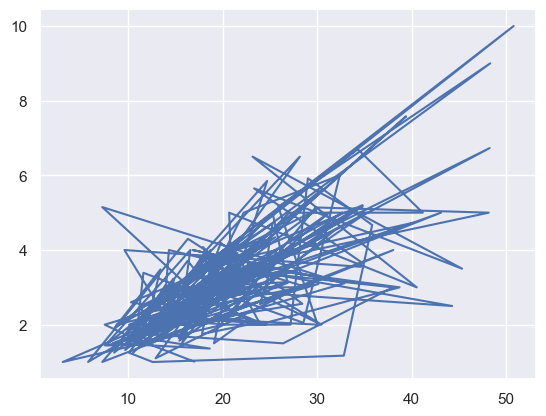

In [6]:
plt.plot(tips.total_bill, tips.tip)

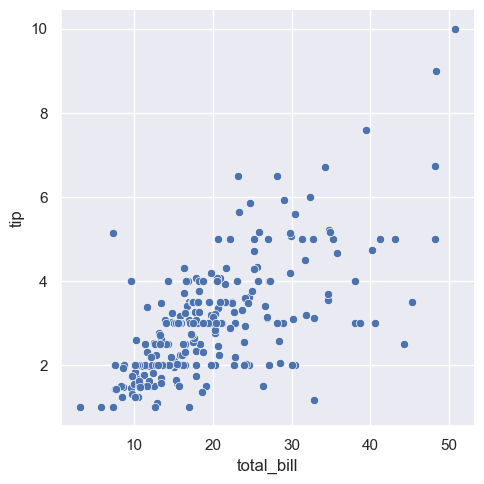

In [8]:
sns.relplot(x='total_bill', y='tip', data=tips)

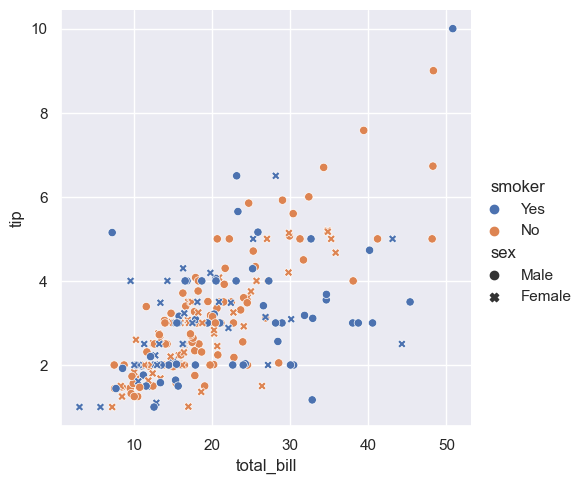

In [10]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='smoker', style='sex')

In [11]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
print(tips.median())
print(tips.mean())

total_bill    17.795
tip            2.900
size           2.000
dtype: float64
total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_13744\474048387.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(tips.median())
C:\Users\admin\AppData\Local\Temp\ipykernel_13744\474048387.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(tips.mean())


In [16]:
tips.groupby('day')['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [18]:
tips.groupby(['day','smoker'])['total_bill','tip'].mean()

C:\Users\admin\AppData\Local\Temp\ipykernel_13744\3542679843.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tips.groupby(['day','smoker'])['total_bill','tip'].mean()


total_bill       tip
day  smoker                      
Thur Yes      19.190588  3.030000
     No       17.113111  2.673778
Fri  Yes      16.813333  2.714000
     No       18.420000  2.812500
Sat  Yes      21.276667  2.875476
     No       19.661778  3.102889
Sun  Yes      24.120000  3.516842
     No       20.506667  3.167895

In [19]:
#tips에서 요일별 groupby 하여 총영수 금액과 팁의 평균과 합을 구하라.
tips.groupby('day')['total_bill','tip'].agg(['mean','sum'])

C:\Users\admin\AppData\Local\Temp\ipykernel_13744\2743466595.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tips.groupby('day')['total_bill','tip'].agg(['mean','sum'])


total_bill                tip        
           mean      sum      mean     sum
day                                       
Thur  17.682742  1096.33  2.771452  171.83
Fri   17.151579   325.88  2.734737   51.96
Sat   20.441379  1778.40  2.993103  260.40
Sun   21.410000  1627.16  3.255132  247.39

In [21]:
#tips에서 요일별 groupby하여 총영수 금액은 합을, 팁은 평균을 구하라
tips.groupby('day').agg({'total_bill':['sum','mean'],'tip':'mean'})

total_bill                  tip
            sum       mean      mean
day                                 
Thur    1096.33  17.682742  2.771452
Fri      325.88  17.151579  2.734737
Sat     1778.40  20.441379  2.993103
Sun     1627.16  21.410000  3.255132